In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol

In [2]:
def im(grid, title = '', origin = 'lower'):
    plt.imshow(grid, origin=origin)
    plt.colorbar()
    plt.title(title)
    plt.show()

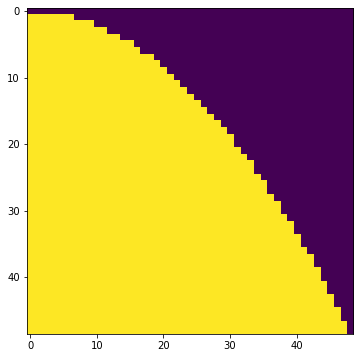

In [3]:
num_points = 49

def bool_domain_gen(num_points):
    x = np.linspace(0, 1, num_points)
    y = np.linspace(0, 1, num_points)
    x_g, y_g = np.meshgrid(x, np.sqrt(1-y))
    y_g = y_g[::-1]
    bool_domain = x_g < y_g
    return bool_domain

bool_domain = bool_domain_gen(num_points)

plt.figure(figsize = (6,6))
plt.imshow(bool_domain)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


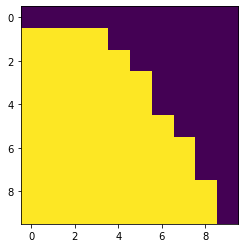

In [4]:
num_points = 10
x = np.linspace(0, 1, num_points)
y = np.linspace(0, 1, num_points)
print(x)

def bool_domain_gen_y(x, y, num_points):
    x_g, y_g = np.meshgrid(x, np.sqrt(1-y))
    y_g = y_g[::-1]
    bool_domain = x_g < y_g
    return bool_domain

#
#  
#

bool_domain = bool_domain_gen_y(x, y, num_points)

plt.figure(figsize = (4,4))
plt.imshow(bool_domain)

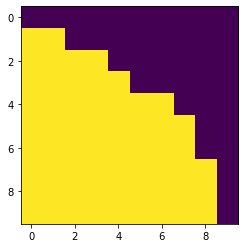

In [5]:
num_points = 10
x = np.linspace(0, 1, num_points)
y = np.linspace(0, 1, num_points)
#print(x)
def bool_domain_gen_x(x, y, num_points):
    x_g, y_g = np.meshgrid(y, 1-x**2)
    y_g = y_g[::-1]
    bool_domain = x_g < y_g
    return bool_domain

bool_domain = bool_domain_gen_x(x, y, num_points)

plt.figure(figsize = (4,4))
plt.imshow(bool_domain)

In [6]:
def domain2(dom_mx):
    vec = np.zeros(len(dom_mx[0,:]))
    for i in range(len(vec)):
        vec[i] = np.sum(dom_mx[i])
    vec = np.flip(vec).astype(int)
    return vec

#print(domain2(bool_domain))

50
50
[[0.0199840382775688, 0.999600638214121], [0.0398732132984429, 0.998410126861257], [0.0595770710243609, 0.996450572608158], [0.0790134194113592, 0.993756879552925], [0.0981112008863785, 0.990374192260633], [0.116812175985778, 0.986354915541468], [0.140103926248326, 0.980370889849804], [0.158388573582499, 0.974913059758501], [0.176119066467251, 0.968982074426704], [0.200000000000000, 0.960000000000000], [0.216936275160024, 0.952938652519694], [0.233273911661972, 0.945583282137922], [0.256914441902510, 0.933994969541922], [0.272296517314178, 0.925854606658569], [0.295627355928210, 0.912604466426896], [0.318912423326231, 0.898294866248191], [0.332827934693703, 0.889225565887524], [0.355476052548091, 0.873636776064827], [0.377885669697796, 0.857202420637048], [0.400000000000000, 0.840000000000000], [0.411982892352458, 0.830270096408903], [0.433291402024652, 0.812258560931511], [0.454243105544974, 0.793663201064858], [0.474820330769775, 0.774545653487681], [0.495012687245648, 0.754962

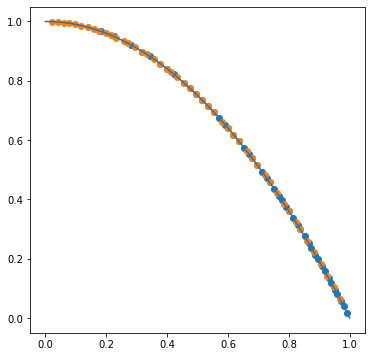

In [7]:
#
#
def projection_y(M): 
#
#   Written by Jan Haakon Melka Trabski, 2023
# 
  solution_list_y = []
  boundary_point_y = []
#
  x = np.linspace(0,1,M+1)
  y = np.linspace(0,1,M+1)
#
  x_current = np.linspace(0,1,M)
  y_current = np.linspace(0,1,M)
  
  print(len(x_current))
#
  P = domain2(bool_domain_gen_y(x_current, y_current, M))
  for i in range(1,len(P)-1):
#    
# Need to evaluate point on the spare matrix    
#     
      r = Symbol('r')
#      
      x_p = x[P[i]+1]
      y_p = y[i]
#
      solution = solve(x_p + r*(1-2*y_p) - 2*r**3, r)
#      
      y_1 = 1 - solution[0]**2
#      
      solution_list_y.append([solution[0],y_1])    
      boundary_point_y.append([(x_p*M-2).astype(int)  ,(y_p*M).astype(int)]) 
#
#
#
  return solution_list_y, boundary_point_y

def projection_x(M): 
#
#   Written by Jan Haakon Melka Trabski, 2023
# 
  solution_list_x = []
  boundary_point_x = []
#
  x = np.linspace(0,1,M+1)
  y = np.linspace(0,1,M+1)
#
  x_current = np.linspace(0,1,M)
  y_current = np.linspace(0,1,M)
# 
  print(len(x_current))
#
  P = domain2(bool_domain_gen_x(x_current, y_current, M))
  for i in range(1,len(P)-1):
#    
# Need to evaluate point on the spare matrix    
#     
      r = Symbol('r')
#      
      x_p = x[i]
      y_p = y[P[i]+1]
#
      solution = solve(x_p + r*(1-2*y_p) - 2*r**3, r)
#      
      y_1 = 1 - solution[0]**2
#      
      solution_list_x.append(([solution[0],y_1]))    
      boundary_point_x.append([(x_p*M).astype(int), (y_p*M-2).astype(int)]) 
#
  return solution_list_x, boundary_point_x
#
# Test
#
B = (projection_y(50))[0] # This is the boundary of Y
A = (projection_x(50))[0] # This is the boundary of X
#
print(A, "X")
print(B, "Y")
#
x  = []
y =  []
#
z =  []
w =  []
#
x_1  = np.linspace(0,1,100)
y_1 = 1-x_1**2
#
for i in B: 
  x.append(i[1])
  y.append(i[0]) 
# 
for i in A: 
  z.append(i[1])
  w.append(i[0])     
#
plt.figure(figsize = (6,6))
plt.scatter(y, x)
plt.scatter(w, z)
plt.plot(x_1,y_1)
plt.show()

20
20
20
20
20
20
ah:3


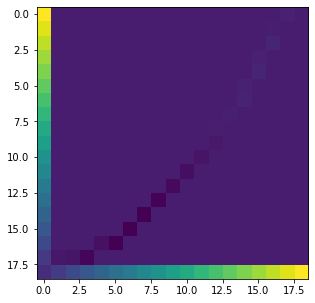

361


In [17]:
def normal_dirichlet(boundaries, alpha = 1, beta = 1):
    """ Create a one-dimensional vector for Dirichlet conditions. Uses natural ordering.

    Args:
        G (array(4 x M-1)): Matrix with row vectors corresponding respectively to boundary at x = x0, y = y0, x = xend, y = yend
        alpha, beta (floats): Constants as defined in text. Optional arguments. 

    Returns:
        g (array(M-1)^2): One dimensional array meant for use in linear system, using natural ordering
    """
    l, t, r, b = boundaries
    M = l.shape[0] - 1         # l is M+1
    G = np.zeros((M-1, M-1))
    G[0, 1:] += beta * b[2:M]
    G[-1, :-1] += beta * t[2: M]
    G[:, 0] += alpha * l[1:M]
    G[:, -1] += alpha * r[1:M]
    """plt.imshow(G)
    plt.show()"""
    return G.flatten()
#
#   New boundrady condtions
#

def f(x, y):
    a = 0
    return np.sin(np.pi * x) * np.cos(np.pi * y)
    

def normal_dirichlet_paranolic_y(M):
#    
#   Written by Jan Haakon Melka Trabski, 2023
#
    B = (projection_y(M))[1]# This is the boundary of Y
    D = (projection_y(M))[0] 
#
    G = np.zeros((M-1, M-1))
# 
    j = 0
#
    for i in B:
#
        G[i[1]-1][i[0]-1] = f(float(D[j][0]),float(D[j][1]))
        j += 1
#   
    return (G) 
#
#
def normal_dirichlet_paranolic_x(M):
#    
    A = (projection_x(M)[1])# This is the boundary of X This is wrong!     
    C = (projection_x(M))[0] 
#    
    G = np.zeros((M-1, M-1))
# 
    j = 0
#
    for i in A:
#
        G[i[1]-1][i[0]-1] = f(float(C[j][0]),float(C[j][1]))
        j += 1    
#        
    return (G) 

def checker(G): 
    for i in range(len(G[0])):
        for j in range(len(G[0])):
            if (G[i][j] > 1): 
                G[i][j] = 1 
                    
                    
    return G  

#
# Testing
# 
M = 20
#
B = (projection_y(M)[1])# This is the boundary of Y
#
A = (projection_y(M)[1])# This is the boundary of X 
#
#print(B, "Y")
#print(A, "X")

l = np.arange(M+1)
t = np.zeros(M+1)
r = np.zeros(M+1)
b = np.arange(M+1)

g5 = (normal_dirichlet([l, t, r, b], 1, 1))


G = np.flip(g5.reshape((M-1,M-1)), 0)
g3 = normal_dirichlet_paranolic_y(M)
g4 = normal_dirichlet_paranolic_x(M)

A  = (np.flip(g5.reshape((M-1,M-1)), 0))
#print(g3)
#print(g4)


print("ah:"+str(len([3,2,1])))
plt.figure(0, figsize = (5,5))
plt.imshow(A+g4+g3)
plt.show()

print(np.size(A))

16.0
ah:3


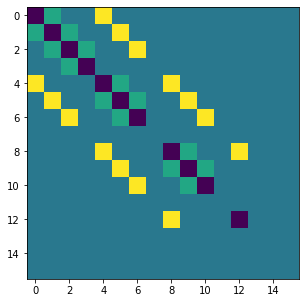

In [9]:
def ndiag(consts, offsets, N):
    """Generate a matrix with arbitrary number of constant diagonals, 0 elsewhere

    Args:
        consts (list of floats):    list containing floats on diagonal
        offsets (list of ints):     list of offsets. Corresponds to the consts list
        N (int):                    length of array

    Returns:
        A (N x N matrix):           matrix with diagonals as specified
    """
    diags = []
    for i in range(len(consts)):
        diags.append(consts[i] * np.ones(N - np.abs(offsets[i])))

    A = np.zeros((N,N))
    for i in range(len(diags)):
        A += np.diag(diags[i], offsets[i])
    return A

def triblock_mod(C, B, M, zerolist):
    A = np.kron(np.eye(M-1), C)
    A += np.kron(ndiag([1,1], [-1, 1], M-1), B)
    if np.size(A) != len(zerolist)**4:
        print("np.size(A) != len(zerolist)")
    for i in range(len(zerolist)):
        A[(i*(len(zerolist))+zerolist[i]):(i+1)*(len(zerolist)), :] = 0
    print(np.sqrt(np.size(A)))
    for i in range(len(zerolist)**2):
        if A[i,i] != 0:
            if A[i+1,i+1] == 0:
                A[i,i+1] = 0
            if i < len(zerolist)**2 - len(zerolist):
                if A[i+len(zerolist),i+len(zerolist)] == 0:
                    A[i, i+len(zerolist)] = 0
    return A

# Testing
M = 5
C = ndiag([1,-2,1], [-1,0,1], (M-1))
B = 3 * np.eye(M-1)
A = triblock_mod(C, B, M, [4,3,3,1])
print("ah:"+str(len([3,2,1])))
plt.figure(0, figsize = (5,5))
plt.imshow(A)
plt.show()

16.0
ah:3


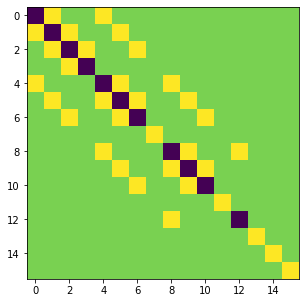

In [10]:
def ndiag(consts, offsets, N):
    """Generate a matrix with arbitrary number of constant diagonals, 0 elsewhere

    Args:
        consts (list of floats):    list containing floats on diagonal
        offsets (list of ints):     list of offsets. Corresponds to the consts list
        N (int):                    length of array

    Returns:
        A (N x N matrix):           matrix with diagonals as specified
    """
    diags = []
    for i in range(len(consts)):
        diags.append(consts[i] * np.ones(N - np.abs(offsets[i])))

    A = np.zeros((N,N))
    for i in range(len(diags)):
        A += np.diag(diags[i], offsets[i])
    return A

def triblock_mod(C, B, M, domain_vec):
    A = np.kron(np.eye(M-1), C)
    A += np.kron(ndiag([1,1], [-1, 1], M-1), B)
    if np.size(A) != len(domain_vec)**4:
        print("np.size(A) != len(domain_vec)**4")
        print(np.size(A))
        print(len(domain_vec)**4)
    for i in range(len(domain_vec)):
        A[(i*(len(domain_vec))+domain_vec[i]):(i+1)*(len(domain_vec)), :] = 0
    print(np.sqrt(np.size(A)))
    for i in range(len(domain_vec)**2):
        if A[i,i] == 0:
            A[i,i] = 1
    for i in range(len(domain_vec)**2):
        if A[i,i] != 1:
            if A[i+1,i+1] == 1:
                A[i,i+1] = 0
            if i < len(domain_vec)**2 - len(domain_vec):
                if A[i+len(domain_vec),i+len(domain_vec)] == 1:
                    A[i, i+len(domain_vec)] = 0
        
    return A

# Testing
M = 5
C = ndiag([1,-4,1], [-1,0,1], (M-1))
B = 1 * np.eye(M-1)


A = triblock_mod(C, B, M, [4,3,3,1])



print("ah:"+str(len([3,2,1])))
plt.figure(0, figsize = (5,5))
plt.imshow(A)
plt.show()

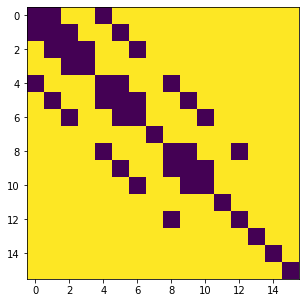

In [11]:
def equation_fixer(A, g2, domain_vec, M, b_function):
    h = 1/M
    if np.size(A) != len(domain_vec)**4:
        print("np.size(A) != len(domain_vec)**4")
    if np.size(A) != len(g2)**2:
        print("np.size(A) != len(g2)**2")
    for i in range(len(domain_vec)**2-1):
        if A[i,i] != 1:
            if A[i,i+1] == 0 or A[i, i+len(domain_vec)] == 0:
                x_p = (i%len(domain_vec)+1)*h
                y_p = (i//len(domain_vec)+1)*h
                eta = (1 - x_p**2 - y_p)/h
                xsi = (np.sqrt(1-y_p) - x_p)/h
                
                A[i,i] = -(-2/xsi - 2/eta)
                if i > 0:
                    A[i,i-1] *=  2 / ((1+xsi))
                A[i, i+1] *= ( 2 / (xsi*(1+xsi)) )
                if i > len(domain_vec):
                    A[i, i-len(domain_vec)] =  2 / ((1+eta))
                if i < len(domain_vec)**2 - len(domain_vec):
                    A[i, i+len(domain_vec)] *=  ( 2 / (eta*(1+eta)) )
                """
                A[i,i] = 5
                
                A[i,i-1] = 5
                A[i, i+1] = A[i, i+1]*5
                if i > len(domain_vec):
                    A[i, i-len(domain_vec)] = 5
                if i < len(domain_vec)**2 - len(domain_vec):
                    A[i, i+len(domain_vec)] = A[i, i+len(domain_vec)]*5
                """
                
                """
                if A[i+1,i+1] == 1:
                    g2[i] += ( 2 / (xsi*(1+xsi)*(h**2)) ) * b_function(x_p + xsi, y_p)
                if i < len(domain_vec)**2 - len(domain_vec):
                    if A[i+len(domain_vec),i+len(domain_vec)] == 1:
                        g2[i] += ( 2 / (eta*(h**2)*(1+eta)) ) * b_function(x_p, y_p + eta)
                """      
                
                if A[i,i+1] == 0 and (i%len(domain_vec)+1) <len(domain_vec)+1:
                    g2[i] += ( 2 / (xsi*(1+xsi)) ) * b_function(x_p + xsi, y_p)
                if i < len(domain_vec)**2 - len(domain_vec):
                    if A[i, i+len(domain_vec)] == 0:
                        g2[i] += ( 2 / (eta*(1+eta)) ) * b_function(x_p, y_p + eta)
                
    return A, g2




left = np.arange(M+1)
top = np.zeros(M+1)
right = np.zeros(M+1)
bottom = np.arange(M+1)


g2 = normal_dirichlet([left, top, right, bottom], 1, 1)

def bndry_func(x,y):
    return x+y

A, g2 = equation_fixer(A, g2, [4,3,3,1], M, bndry_func)
plt.figure(0, figsize = (5,5))
for i in range(int(np.sqrt(np.size(A)))):
    for j in range(int(np.sqrt(np.size(A)))):
        if A[i,j] == 0:
            A[i,j] = True
        else:
            A[i,j] = False
plt.imshow(A)
plt.show()

In [12]:
for i in range(int(np.sqrt(np.size(A)))):
    for j in range(int(np.sqrt(np.size(A)))):
        if A[i,j] == 0:
            A[i,j] = True
        else:
            A[i,j] = False

In [13]:
def hyper_f_fixer(function_vec, domain_vec):
    mod_f_vec = function_vec
    for i in range(len(function_vec)):
        if function_vec[i] > domain_vec[i//len(domain_vec)]:
            mod_f_vec[i] = 0
    return mod_f_vec

[0. 0. 0. ... 1. 1. 0.]
40
40
40
40
1521.0


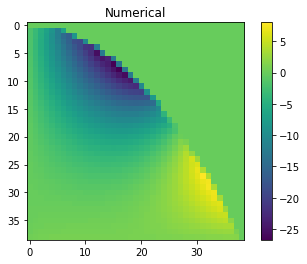

In [16]:
M = 40
h = 1/M
a = 0.1

left = np.ones(M+1)
left = np.arange(M+1)
left = np.sin(left*5)
top = np.zeros(M+1)
right = np.zeros(M+1)
bottom = np.ones(M+1)
#g2 = normal_dirichlet([left, top, right, bottom], a, 1)


g2 = normal_dirichlet([left, bottom, right, top], 0, 1)

print(g2)

#print(np.size(g2))

g3 = normal_dirichlet_paranolic_y(M) 
g4 = normal_dirichlet_paranolic_x(M)
A  = (np.flip(g2.reshape((M-1,M-1)), 0))

g2 = (g3+g4+A).flatten()

def hyper_bndry_func(x,y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

C = ndiag([1,-4,1], [-1,0,1], (M-1))
B = 1 * np.eye(M-1)


def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

"""
def f(x, y):
    return np.pi**2 * ((a+1+r**2) * np.sin(np.pi * x) * np.cos(np.pi * y) + 2*r * np.cos(np.pi * x) * np.sin(np.pi * y))
"""

def f(x, y):
    return np.pi**2 * ((a+2) * np.sin(np.pi * x) * np.cos(np.pi * y) + 2 * np.cos(np.pi * x) * np.sin(np.pi * y))


x = np.linspace(0, 1, M+1)
y = np.linspace(0, 1, M+1)
xx, yy = np.meshgrid(x, y)
fmat = f(xx, yy)[1:-1, 1:-1]
fvec = fmat.flatten()
U_exact = u_exact(xx, yy)
b = U_exact[0, :]
t = U_exact[-1, :]
l = U_exact[:, 0]
r = U_exact[:, -1]
boundaries = [l,t,r,b]

omega = domain2(bool_domain_gen(M-1))

#hyper_funtion = hyper_f_fixer(np.ones((M-1)**2), omega)

A = triblock_mod(C, B, M, omega)

#A, g2 = equation_fixer(A, g2, omega, M, hyper_bndry_func)

U_vec = np.linalg.solve(A, -g2 - fvec*h**2)
U = U_vec.reshape((M-1, M-1))[::-1]

plt.title('Numerical')
plt.imshow(U)
plt.colorbar()
plt.show()

50
50
50
50
2401.0


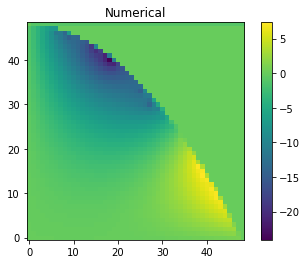

In [15]:
M = 50
h = 1/M
a = 0


def hyper_bndry_func(x,y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

C = ndiag([1,-4,1], [-1,0,1], (M-1))
B = 1 * np.eye(M-1)

def u_exact(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

"""
def f(x, y):
    return np.pi**2 * ((a+1+r**2) * np.sin(np.pi * x) * np.cos(np.pi * y) + 2*r * np.cos(np.pi * x) * np.sin(np.pi * y))
"""

def f(x, y):
    return np.pi**2 * (2) * np.sin(np.pi * x) * np.cos(np.pi * y) 

x = np.linspace(0, 1, M+1)
y = np.linspace(0, 1, M+1)
xx, yy = np.meshgrid(x, y)
fmat = f(xx, yy)[1:-1, 1:-1]
fvec = fmat.flatten()
U_exact = u_exact(xx, yy)

left = np.ones(M+1)
left = np.arange(M+1)
left = np.sin(left*5)
top = np.zeros(M+1)
right = np.zeros(M+1)
bottom = np.ones(M+1)

l = np.arange(M+1)
t = np.arange(M+1)
r = np.zeros(M+1)
b = np.zeros(M+1)

g2 = normal_dirichlet([left, top, right, bottom], a, 1)

#g2 = normal_dirichlet([l, t, r, b], 0, 1)

g3 = normal_dirichlet_paranolic_y(M) 
g4 = normal_dirichlet_paranolic_x(M)
A  = (np.flip(g2.reshape((M-1,M-1)), 0))

g2 = (g3+g4+A).flatten()

omega = domain2(bool_domain_gen(M-1))

hyper_funtion = hyper_f_fixer(fvec, omega)

A = triblock_mod(C, B, M, omega)

#A, g2, used, indexes_used = equation_fixer(A, g2, omega, M, hyper_bndry_func, hyper_funtion)
#G = g2.reshape((M-1,M-1))
U_vec = np.linalg.solve(A, -g2 - hyper_funtion*h**2)
U = U_vec.reshape((M-1, M-1))
#im(used[0].reshape((M-1,M-1)))
#im(used[1].reshape((M-1,M-1)))
im(U, 'Numerical')